In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from graphviz import Digraph

In [8]:
class Value:
    def __init__(self,data, _children=(), _op=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
    
    def __repr__(self) -> str:
        return f"Value({self.data})"
    
    def __add__(self, other_value):
        return Value(self.data + other_value.data, (self, other_value), '+')
    
    def __mul__(self, other_value):
        return Value(self.data * other_value.data, (self, other_value), '*')
    
    def tanh(self):
        x =self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        return out
        

In [9]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

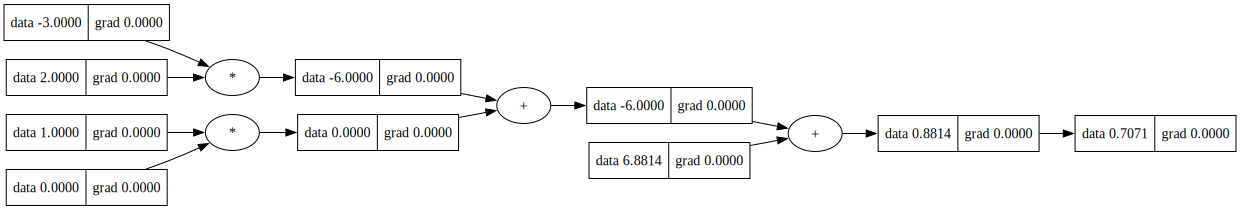

In [17]:
# Building neural network
# inputs x1, x2
x1 = Value(2.0)
x2 = Value(0.0)
# weights w1, w2
w1 = Value(-3.0)
w2 = Value(1.0)
# bias
b = Value(6.8813735870195432)

x1w1 = x1 * w1
x2w2 = x2 * w2
x1w1_x2w2 = x1w1 + x2w2
n = x1w1_x2w2 + b
o = n.tanh()
draw_dot(o)

In [21]:
o.grad = 1.0
n.grad = 1 - o.data**2
x1w1_x2w2.grad = n.grad
b.grad = n.grad
x1w1.grad = x1w1_x2w2.grad
x2w2.grad = x1w1_x2w2.grad
x1.grad = x1w1.grad * w1.data
x2.grad = x2w2.grad * w2.data
w1.grad = x1w1.grad * x1.data
w2.grad = x2w2.grad * x2.data


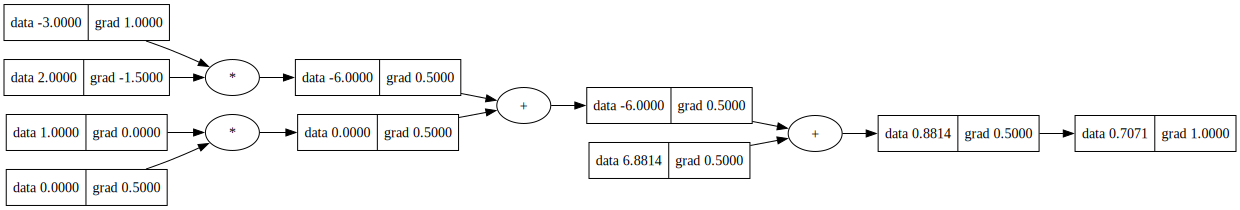

In [22]:
draw_dot(o)

In [23]:
#  We see that increasing w2 will increase the output of the network